In [1]:
from xinet import utils
from xinet import torch as xinet

np = xinet.np

In [2]:
def normal(x, mu, sigma):
    p = 1 / np.sqrt(2 * np.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

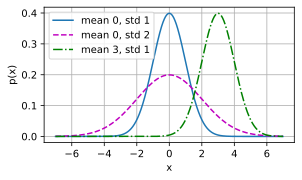

In [3]:
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
utils.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
           ylabel='p(x)', figsize=(4.5, 2.5),
           legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [4]:
from d2l import torch as d2l

In [5]:
true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [6]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.9434, -0.3749]) 
label: tensor([3.5805])


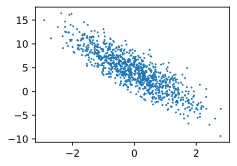

In [7]:
utils.set_figsize()
utils.plt.scatter(features[:, (1)], labels, 1);

In [ ]:
batch_size = 10
data_iter = xinet.load_array((features, labels), batch_size)

In [ ]:
w = np.normal(0, 0.01, (2, 1))
b = np.zeros(1)
w.requires_grad_ = True
b.requires_grad_ = True

In [ ]:
def linreg(X, w, b):  #@save
    """线性回归模型。"""
    return np.dot(X, w) + b

In [ ]:
def squared_loss(y_hat, y):  #@save
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [ ]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()